# LANL Earthquake Prediction

# 1. Business Problem

## 1.1. Description

Source: https://www.kaggle.com/c/LANL-Earthquake-Prediction

Correctly predicting earthquakes is very important for preventing deaths and damage to infrastructure.
Forecasting earthquakes is one of the most important problems in Earth science because of their devastating consequences. Current scientific studies related to earthquake forecasting focus on three key points: when the event will occur, where it will occur, and how large it will be.

#### **Problem statement :** Here we have to predict is the remaining time before the next laboratory earthquakes based on the seismic data.

Remaining time meant by the remaining time between current earthquake and occurrence of next earthquake.

## 1.2. Source/Useful Links

Some articles and reference blogs about the problem statement

Blog 1. https://medium.com/@saivenkat_/a-detailed-case-study-on-lanlearthquake-prediction-using-machine-learning-algorithms-beginnerto-9b38ef270887

Blog 2. https://www.pnas.org/doi/10.1073/pnas.2011362118

Blog 3. Time series https://analyticsindiamag.com/a-guide-to-feature-engineering-in-time-series-with-tsfresh/

Kaggle Winning Solution and other approaches: 4. https://medium.com/@ph_singer/1st-place-in-kaggle-lanl-earthquakeprediction-competition-15a1137c2457


## 1.3 Data Information

Ge the data from https://www.kaggle.com/c/LANL-Earthquake-Prediction 
All the data is generated in one laboratory because using real data and predicting the earthquake is very hard.The only feature we have is the seismic signal (acoustic data), which is recorded using a piezoceramic sensor and corresponds to the voltage upon deformation (in integers)

The dataset contains:-

    A. Train.csv, in this file, contains 2 columns, the 1st one is acoustic_data which is a wave (The scientific study of sound, especially of its generation, transmission, and reception) this wave looks like sound waves &  continuous segment of experimental data. And 2nd one is time_to_failure, basically, it is a remaining time to the next earthquake

    B. Test.csv, in this folder there are a many of .csv files available and each file contains a series of acoustic waves, and in each test file in the test set contains only 150,000 samples.
 
Both train and test come from the same exp.

# 2 ML Problem Formulation
Time-series forecasting and Regression.

Predict the remaining time before the next laboratory earthquakes based on the seismic data.

### 2.1 Brief intro about the Time Series.

As we know that our problem is based on the time series let's learn what is time series,
Basically, we have two types of time series problems present.
#### 1. Univariate Time Series
It means when you want to do something forecasting based on a single variable it's called univariate time series. Eg earthquake prediction.
And handle the univariate time series we have some good models like ARIMA, Facebook Prophet, etc. we learn all models later in this notebook.
#### 2.  Multivariate Time Series
It means when you have more than two features and predict the variables based on other features it is called a multivariable time series, Eg when you have features like Date, Humidity, rainfall and you want to predict the Temputer based on other features, it's become multivariate time series problem.

<img src="https://i.imgur.com/uHZMGkC_d.webp?maxwidth=760&fidelity=grand" alt="alternatetext">

# 3 Performance Metrics

As we know the given problem is a regression-based problem so we can use the performance metrics as Mean Absolute Error(MAE), Mean Squared Error(MSE), RMSE, etc.

But here we use Mean Absolute Error(MAE), MAE is a very simple metric that calculates the absolute difference between actual and predicted values, and We took this problem from the kaggle so kaggle is provided this evaluation metrics.

Our data is Stationary in nature so MAE is very useful to use Mean Absolute Error as an evaluation Metric.

The metric for evaluation is provided as a mean absolute error (MAE). So we will be working with MAE as a metric. 

And as the second matric, we can use a MAPE which is a give very good sense of predicting values.

more about it https://analyticsindiamag.com/a-guide-to-different-evaluation-metrics-for-time-series-forecasting-models/

In [1]:
#improt the some library
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
import scipy
import dask.dataframe as dd
#import hvplot.dask
from statsmodels import robust
from scipy.stats import skew
from scipy.stats import kurtosis
from tqdm import tqdm

# 4 Exploratory Data Analysis(EDA)

### 4.1  Acoustic Data

In [2]:
#let's first check the size of the data set here
import os
import math
size = os.path.getsize("train.csv") / math.pow(1024,3) # here we get size in KB and we convert it into a GB
print("Size of data is in GB : {} ".format(size))

Size of data is in GB : 8.89930710569024 


In [3]:
# read a data using a dask library
df = dd.read_csv('train.csv')

In [3]:
#here help of pandas we display 13 digit of the our target variable by doing this we get better idea.
pd.options.display.precision = 13
df.head()

,acoustic_data,time_to_failure
0,12,1.4690999832
1,6,1.4690999821
2,8,1.4690999810
3,5,1.4690999799
4,8,1.4690999788


In [5]:
#print the data information 
df.info()

<class 'dask.dataframe.core.DataFrame'>
Columns: 2 entries, acoustic_data to time_to_failure
dtypes: float64(1), int64(1)

In [6]:
#total number of row in our data set
len(df.index) 

629145480

Here we have a very huge amount of data set present

In [5]:
#minmum value of the acoustic data 
min(df.acoustic_data)

-5515

In [6]:
#print the maximum value of the acoustic_data
max(df.acoustic_data)

5444

In [6]:
#mean value of the acoustic_data
df.acoustic_data.mean().compute()

4.519467573700124

In [5]:
#Checking the if any values is null or not
df.isnull().sum().compute()

acoustic_data      0
time_to_failure    0
dtype: int64

Here given data is a very huge .csv file, we have roughly  9 GB of the earthquake data, this data is a high amount of data.

The minimum and maximum value of the acoustic wave is (-5515, 5444)

There is not a null value present in both column

mean value of the acoustic wave is 4.519.

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


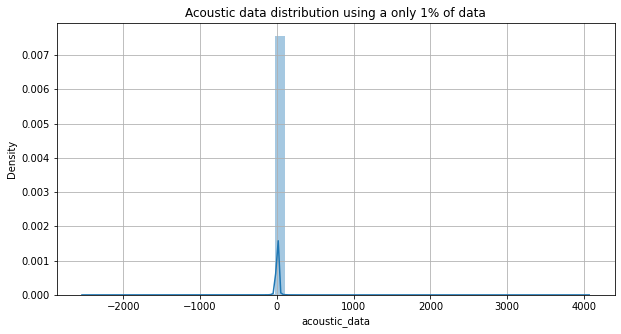

In [11]:
#print the pdf of the acoustic_data 
#Here we first take a sub_sumple of the acoustic_data and we use this data for print a pdf
#we take a 1% of dara in whole dataset
sample = df.sample(frac=0.01)
plt.figure(figsize=(10,5))
plt.title("Acoustic data distribution using a only 1% of data")
plt.grid()
ax = sns.distplot(sample.acoustic_data)

Here we plot a distribution of the acoustic data by using only 1% of the data,

By looking at the pdf of acoustic wave we can say there are many points lie between the range of -10 to 20 and here many points are values is very high like -2000 to 4000

By looking we get some idea about acoustic wave values but here we can not say clearly about data distribution, so let's zoom the plot of the distribution of acoustic waves.

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


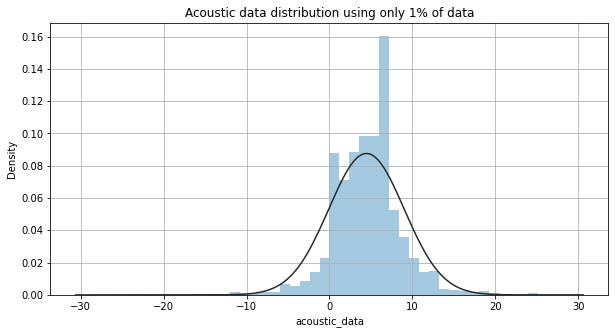

In [20]:
sample = df.sample(frac=0.01)
sample = sample.acoustic_data[sample.acoustic_data.between(-30, 30)] #here we take a range 
plt.figure(figsize=(10,5))
plt.title("Acoustic data distribution using only 1% of data")
plt.ylabel('Density')
plt.grid()
ax = sns.distplot(sample, kde=False, fit=stats.norm)

Now we take the values of acoustic waves between -30 to 30 and here also we take only 1% of the data from the total data.

Now here we clearly see the distribution and by looking at the plot we can say -10 to 20 values of acoustic wave follow a gaussian/normal distribution of data. Here most acoustic waves have a value is 8 by looking at the bin of the histogram.

<AxesSubplot:title={'center':'Boxplot with sampled acoustic data and time to failure data'}>

<Figure size 720x360 with 0 Axes>

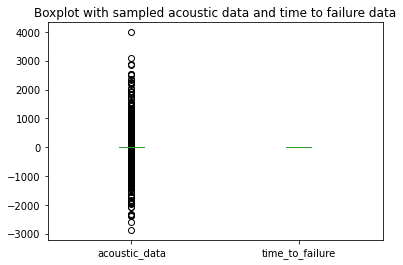

In [14]:
#We plot a box plot on the sub_sample of acoustic_data.
#https://stackoverflow.com/questions/56852380/how-to-plot-huge-dask-dataframe-box-plot-preferably-holoviews
sample = df.sample(frac=0.01)
sample.compute().plot.box(title='Boxplot with sampled acoustic data and time to failure data')

<AxesSubplot:title={'center':'Boxplot with sampled time to failure data'}>

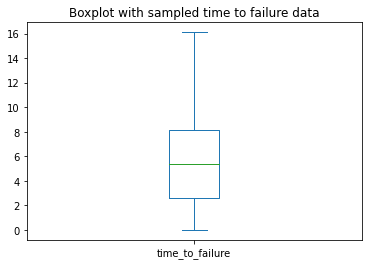

In [17]:
sample = df.sample(frac=0.01)
sample = sample.time_to_failure
sample.compute().plot.box(title='Boxplot with sampled time to failure data')

here we take 1% of the data and plot the box plot for a better understanding of the acoustic wave and outliers.

By looking at the boxplot we can say there are many outliers present we need to remove them and also we can not see what is the 25th and 75th percentile values.

Next, we looking the percentile values and remove the outliers.

In [ ]:
import numpy as np
a = np.array(list(df.acoustic_data))
for i in range(5 , 105,5):
    p = np.percentile(a, i)
    print(i,' percentile value is',p)

5  percentile value is -2.0
10  percentile value is 0.0
15  percentile value is 1.0
20  percentile value is 2.0
25  percentile value is 2.0
30  percentile value is 3.0
35  percentile value is 3.0
40  percentile value is 4.0
45  percentile value is 4.0
50  percentile value is 5.0
55  percentile value is 5.0
60  percentile value is 5.0
65  percentile value is 6.0
70  percentile value is 6.0
75  percentile value is 7.0
80  percentile value is 7.0
85  percentile value is 8.0
90  percentile value is 9.0
95  percentile value is 11.0
100  percentile value is 5444.0


In [ ]:
for i in range(90 , 101,1):
    p = np.percentile(a, i)
    print(i,' percentile value is',p)

90  percentile value is 9.0
91  percentile value is 9.0
92  percentile value is 10.0
93  percentile value is 10.0
94  percentile value is 11.0
95  percentile value is 11.0
96  percentile value is 12.0
97  percentile value is 13.0
98  percentile value is 15.0
99  percentile value is 20.0
100  percentile value is 5444.0


In [4]:
a = np.array(list(df.acoustic_data))
for i in np.arange(0.1, 1.1, 0.1):
    b = (99+i)/100* 100
    p = np.percentile(a, b)
    print(b,' percentile value is',p)

99.1  percentile value is 21.0
99.2  percentile value is 22.0
99.3  percentile value is 24.0
99.4  percentile value is 25.0
99.5  percentile value is 28.0
99.6  percentile value is 31.0
99.7  percentile value is 35.0
99.8  percentile value is 42.0
99.9  percentile value is 56.0
100.0  percentile value is 5444.0


Here we have printed the three sections of the percentile values,

In the first section of the percentile values, we print 5 to 100 percentile values with the gap of 5, and from the percentile values, we can say 5 percentile to 95 percentile values lies between the -2 to 11 and above the 95 percentile value acoustic wave value is very high, so now let's zoom to values between the 90 to 100.

In the second section, we print the values between 90 to 100 percentiles,

Here we saw that 90 to 99 percentile values are normal but at 100 percentile value is very high, so we go further and zoom the values between the 99 to 100 percentile values.

In the 3rd section, we zoom further into the values and we saw that 99.9 percentile values lie 56 or less than 56 but here 99.9 to 100 percentile values are lies in the 56 to 5444 range.

So we can say this is an outlier and we have to remove them.

In [4]:
#removing further outliers based on the 5th and 99.9th percentile values
acoustic_data = df[(df.acoustic_data >-2.0) & (df.acoustic_data<56.0)]

In [7]:
#after removing the outliers, number of data points we have
len(acoustic_data)

591155476

In [15]:
#take 1% of data from clean dataset
sample = acoustic_data.sample(frac=0.01)

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


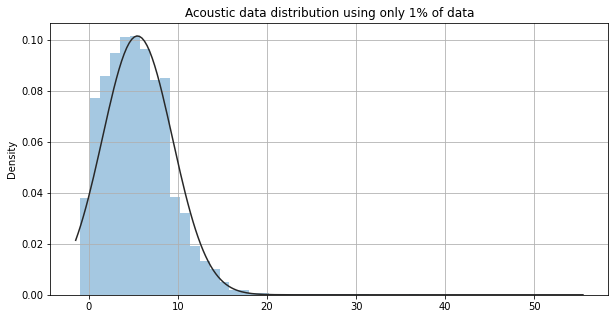

In [10]:
#plot a distribution of the clean data 
plt.figure(figsize=(10,5))
plt.title("Acoustic data distribution using only 1% of data")
plt.ylabel('Density')
plt.grid()
ax = sns.distplot(sample, kde=False, fit=stats.norm)

After removing the outliers we take 1% of the sample data we plot a distribution of Acoustic waves and here we see some parts of the data are following the gaussian distribution and most values lie between the -2 to 55.

<AxesSubplot:title={'center':'Boxplot with sampled acoustic data and time to failure data'}>

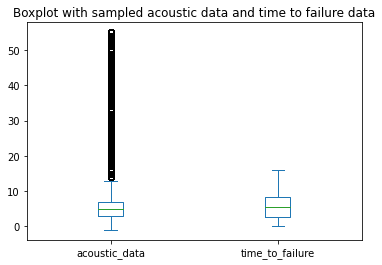

In [16]:
sample.compute().plot.box(title='Boxplot with sampled acoustic data and time to failure data')

After the remove the outliers we can find a 25th and 75th percentile values from the box plot,
here 25th percentile values are 4 and the 75th percentile value is 8.

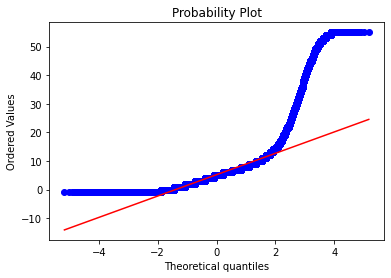

In [13]:
#Q-Q plot for checking if trip-times is log-normal
scipy.stats.probplot(d, plot=plt)
plt.show()

From the Q-Q plot, we can say -2 to 2 values of Acoustic wave is following gaussian distribution.

### 4.2 Time To Failure

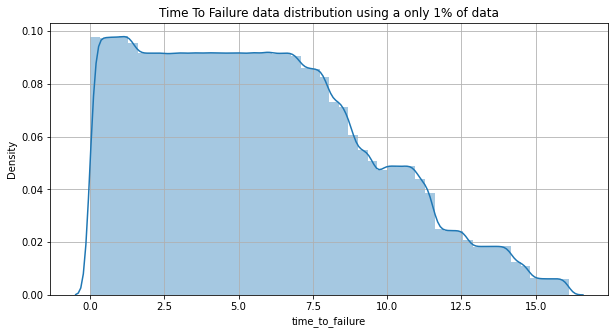

In [20]:
#Pdf of the time to failure data
sample = df.sample(frac=0.01)
plt.figure(figsize=(10,5))
plt.title("Time To Failure data distribution using a only 1% of data")
plt.grid()
ax = sns.distplot(sample.time_to_failure)

Here we plot a distribution of our target variable which is time to failure, here we take only 1% of the data and we can say from the pdf we have a very fewer amount of data we remaining time of next earthquake is more than 15 sec.

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


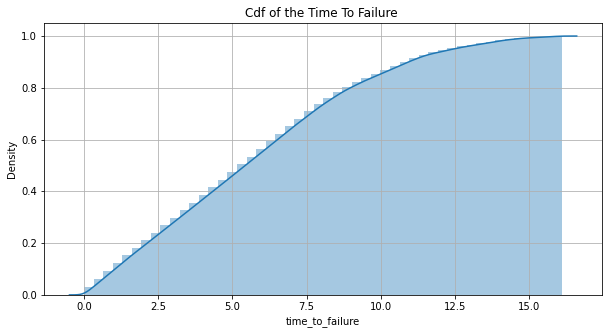

In [7]:
#CDF of the Time To Failure
plt.figure(figsize=(10,5))
plt.title("Cdf of the Time To Failure ")
ax = sns.distplot(sample.time_to_failure, hist_kws=dict(cumulative=True), kde_kws=dict(cumulative=True))
plt.grid()

Here we plot a CDF of time to failure data, and we can say that 80% of data remaining time of the next earthquake is less than 9 sec.

### 4.3 Acoustic data and Time to failure 

In [32]:
#here we take a very very small subset of the data from original data
sample = acoustic_data.sample(frac=0.000001)

In [30]:
len(sample)

59106

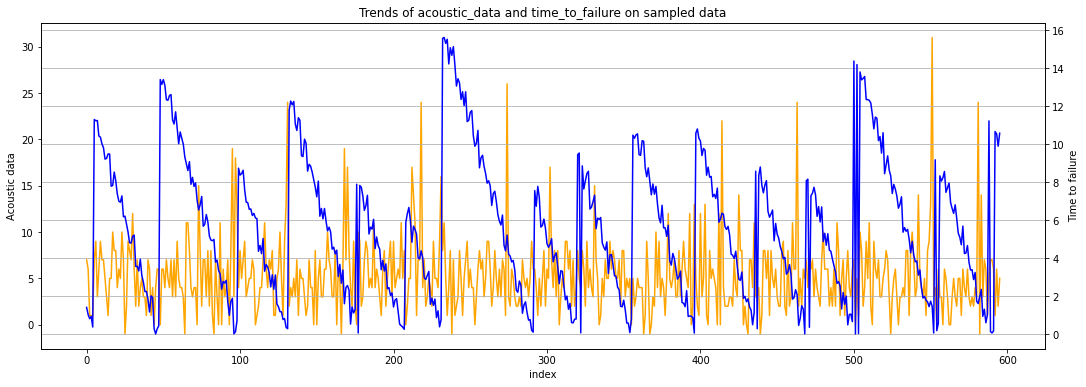

In [39]:
# Plot a Acoustic data and Time To Failure 
#https://www.geeksforgeeks.org/matplotlib-axes-axes-twinx-in-python/
fig, ax1 = plt.subplots(figsize=(18, 6))
ax2 = ax1.twinx()
ax1.set_xlabel('index')
ax1.set_ylabel('Acoustic data')
ax2.set_ylabel('Time to failure')
plt.title("Trends of acoustic_data and time_to_failure on sampled data")
p1 = sns.lineplot(data=sample.acoustic_data, ax=ax1, color='orange')
p2 = sns.lineplot(data=sample.time_to_failure, ax=ax2 , color = 'blue')
plt.grid()

For the clear visualization, we take very less data for this plot.

Let's see how both variables change over time, the orange line is the acoustic data and the blue one is the time of failure

Here we can see data in the repeating pattern of the acoustic wave and wherever the signal is maxed values this signal is earthquake point, so here we have a total of 16 earthquake signals, and with the signal wave, we also plot the remaining time before the next earthquake.

Here we saw all earthquakes we have some remaining time for the next earthquake, and The shortest time to failure is 1.5 seconds and the longest is around 16 seconds.

# 5 Test data

In [14]:
#read test file
test = pd.read_csv('seg_00184e.csv')
test.head()

,acoustic_data
0,8
1,2
2,3
3,8
4,7


In [15]:
test.shape

(150000, 1)

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


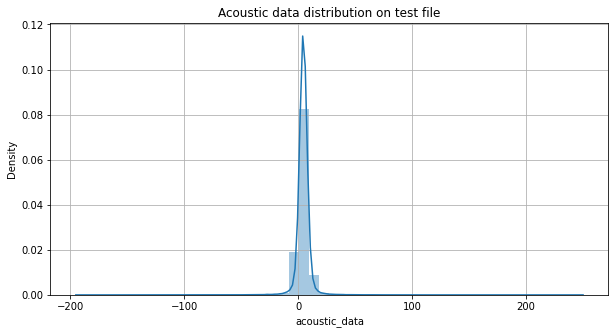

In [19]:
#pdf of test files
plt.figure(figsize=(10,5))
plt.title("Acoustic data distribution on test file")
ax = sns.distplot(test.acoustic_data, label='test_data')
plt.grid()

<Figure size 720x360 with 0 Axes>

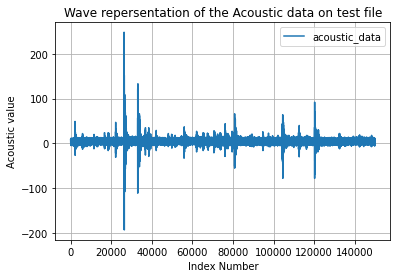

In [25]:
plt.figure(figsize=(10,5))
test.plot()
plt.title('Wave repersentation of the Acoustic data on test file')
plt.xlabel('Index Number')
plt.ylabel('Acoustic value')
plt.grid()

In the test data, we have a different CSV file and each CSV file contain 150,000 values of acoustic data (single column)

Here I have plotted a one-sample file for the understanding and we also plot a distribution plot, and the distribution is very picked.

And the second plot we plot all Acoustic wave values.

# 6 Dickey Fuller Tests

So many tests are available to test given data is Stationary or Non-Stationary and one of the popular tests is **called the dickey fuller test or it is also called Augmented Dickey-fuller(ADF) test.**

A time series is set to be stationary if the statistical property does not change over the time that is mean and variance is constant.

Given the plot of the time to failure, we can say it is Stationary but how we can prove this.

In [4]:
sample = df.sample(frac=0.0001)

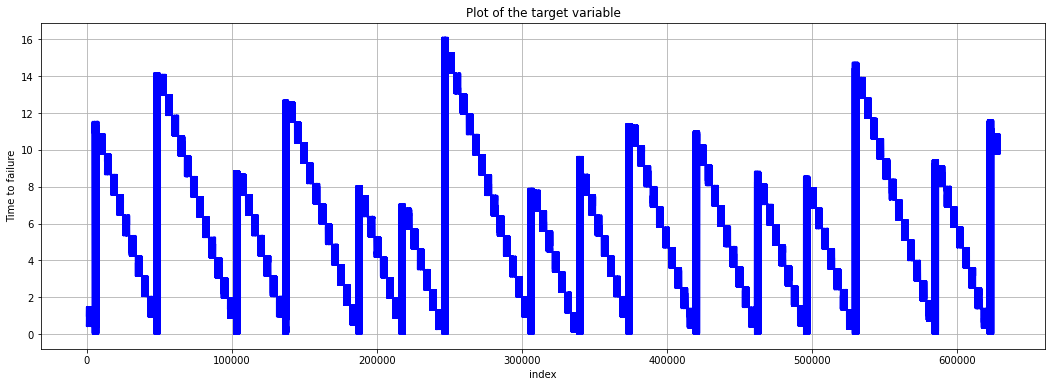

In [6]:
import seaborn as sns
# Plot a Acoustic data and Time To Failure 
#https://www.geeksforgeeks.org/matplotlib-axes-axes-twinx-in-python/
fig, ax1 = plt.subplots(figsize=(18, 6))
ax1.set_xlabel('index')
ax1.set_ylabel('Time to failure')
plt.title("Plot of the target variable")
p2 = sns.lineplot(data=sample.time_to_failure, ax=ax1 , color = 'blue')
plt.grid()

In [5]:
# more about it https://www.youtube.com/watch?v=warCSvy1DMk&t=367s
#H0 is Time Series is Non-Stationary
#H1 is Time Series is Stationary

import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
X = sample.time_to_failure.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
# we reject and accept the Null hypothesis at 5% values
if result[0] < result[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

ADF Statistic: -4.627590
p-value: 0.000115
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567
Reject Ho - Time Series is Stationary


To prove the data is Stationary or not where the ADF test comes into the picture, for any test we have the null hypothesis H0 and alternative hypothesis H1,

So in the ADF test **Null hypothesis H0 is Time Series is Non-Stationary** in nature and the alternate hypothesis **H1 is Time Series is Stationary** in nature

To perform the ADF test we use an adfuller library and this returns three values:-

1:- ADF Statistic value, 2:-p-value, and 3:- Critical Values.

So if the **ADF Statistic < Critical Values then we Reject the H0** which means Time Series is Non-Stationary
if the **ADF Statistic > Critical Values then we Accept the H0** which means Time Series is Non-Stationary.

Or same things you can say using the p-values
if the p-value is very very less reject the H0 and the p-value is high then accept the H0
